# < NHÓM 05 > LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
## 1. Hiểu dữ liệu
- Dữ liệu chính là điểm thi đại học của các học sinh THPT.
- Dữ liệu dòng: 
    - Ý nghĩa của mỗi dòng:
    - Có vấn đề các dòng có ý nghĩa khác nhau không?
- Dữ liệu cột:
    - Ý nghĩa của mỗi cột:
    - Mỗi cột hiện có kiểu dữ liệu là: 
    - Cột có kiểu dữ liệu không phù hợp, có thể xử lý tiếp không ?
## 2. Thu thập dữ liệu:
- Nguồn dữ liệu: từ một repo github
- Dạng input đầu vào: file csv
- Số lượng input đầu vào: 4 file csv
- Sự khác nhau giữa các input: **Có file khác nhau về số cột** 

# THU THẬP DỮ LIỆU
- Để tiến hành thu thập dữ liệu, như đã nêu ở trên, các input có sự khác nhau nên ta phải tìm input khác (ở đây input data 2021, 2022 là khác so với các input data còn lại).
- Sau đó ta sẽ tiến hành thu thập dữ liệu và đưa về thành 1 data duy nhất (từ 4 input ta sẽ đưa về thành 1 input để tiền xử lý)
- Ta sẽ thực hiện theo các bước sau:
    - Bước 1: Đọc file input của 4 năm 
    - Bước 2: Xóa các cột dư thừa 
    - Bước 3: Thêm một cột mới để định danh cho file đó
    - Bước 4: Nối các dữ liệu lại với nhau và xuất thành 1 file csv mới.

Cùng làm thôi...

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Khám phá dữ liệu (đan xen với pha tiền xử lý dữ liệu)

### Đọc dữ liệu từ tập tin 

Đọc dữ liệu từ file `score_college_exam_data.csv` và lưu vào DataFrame `core_df`.

In [150]:
core_df = pd.read_csv('score_college_exam_data.csv', index_col= "Unnamed: 0")
core_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Ta tính số dòng và số cột của DataFrame `core_df` và lưu vào biến `shape` (tuple). 

In [151]:
shape = core_df.shape
shape

(3665169, 11)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong DataFrame `core_df` cho biết kết quả điểm thi đại học của học sinh Việt Nam từ năm 2019 đến năm 2022. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau (lúc sau, nếu phát hiện ra vấn đề thì ta sẽ quay lại đây). 

### Dữ liệu có các dòng bị lặp không?

In [152]:
num_duplicated_rows = core_df.duplicated().sum()
if num_duplicated_rows == 0:
    print('Khong co dong trung')
else:
    print('Co dong trung (nen loai bo)')
    core_df.drop_duplicates(inplace= True)


Co dong trung (nen loai bo)


In [153]:
core_df.duplicated().sum()

0

## Mỗi cột có ý nghĩa gì?

- **Year** là năm thi của thí sinh

- **sbd** là số báo danh của thí sinh

- Các cột còn lại là điểm thi theo các môn của các thí sinh. Những giá trị NaN là môn mà thí sinh đó không tham gia thi.


In [154]:
core_df.columns

Index(['Year', 'sbd', 'Toan', 'Van', 'Ngoai_ngu', 'Li', 'Hoa', 'Sinh', 'Su',
       'Dia', 'GDCD'],
      dtype='object')


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [155]:
core_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660578 entries, 0 to 995440
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Year       int64  
 1   sbd        int64  
 2   Toan       float64
 3   Van        float64
 4   Ngoai_ngu  float64
 5   Li         float64
 6   Hoa        float64
 7   Sinh       float64
 8   Su         float64
 9   Dia        float64
 10  GDCD       float64
dtypes: float64(9), int64(2)
memory usage: 335.1 MB


In [156]:
core_df['sbd'] = core_df['sbd'].astype(str)

Các cột đều có dạng `numeric` và đều phù hợp nên không cần xử lý kiểu dữ liệu của các cột nữa.

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

Với các cột điểm, Ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max


Bạn sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột điểm trong `core_df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"

Để dễ nhìn, tất cả các giá trị ta đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [157]:
def get(col):
    NaNValue = col.isna().sum()
    valu1 = col.dropna()
    x = []
    x.append((NaNValue/len(col))*100)
    x.append(np.percentile(valu1, 0))
    x.append(np.percentile(valu1, 25))
    x.append(np.percentile(valu1, 50))
    x.append(np.percentile(valu1, 75))
    x.append(np.percentile(valu1, 100))
    return np.array(x).round(1)

index_info=["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
dict_info = {}
for i in core_df.columns:
    if core_df[i].dtype in [np.float32, np.float64]:
        dict_info[i] = get(core_df[i])   
num_col_info_df =pd.DataFrame(dict_info,index_info)
num_col_info_df

,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
missing_ratio,0.8,1.5,11.6,65.7,65.5,66.0,34.4,35.1,44.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,5.2,5.5,3.4,5.5,5.2,4.2,3.8,5.8,7.2
median,6.6,6.5,4.6,6.8,6.5,5.0,5.0,6.8,8.2
upper_quartile,7.8,7.2,6.4,7.5,7.8,6.0,6.5,7.5,9.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


## Câu hỏi: Liệu học phí có ảnh hưởng quá nhiều đến điểm chuẩn?

### Như chúng ta đã biết, năm 2022 ngành IT hệ đại trà ở trường ĐH KHTN đã tăng học phí lên 27 triệu/năm, nhiều gần gấp đôi so với mức học phí cũ (14.5tr). Như vậy, điều này có làm cho ngành này giảm điểm mạnh không? Hay cho dù có tăng nhưng điểm số cũng không ảnh hưởng.

### Dựa vào bộ dữ liệu điểm thi và điểm chuẩn của 3 hệ ngành IT (Đại trà, tiên tiến, CLC) những năm 2019,2020,2021, đưa ra dự đoán điểm chuẩn của các nhóm ngành này vào năm 2022 (không xét tới yếu tố học phí) và so sánh với thực tế xem là học phí có phải thứ ảnh hưởng quá nhiều đến điểm chuẩn không? (Giả sử ta chỉ tính điểm của các thí sinh thi khối A0,A1)

Ta chỉ xét những bạn thi khối A0 và A1, nên những bạn không thi những môn trong các khối này sẽ bị loại đi

In [158]:
data_for_A = core_df.dropna(subset=['Toan','Li','Hoa','Ngoai_ngu'])

Làm như trên có thể vô tình loại luôn những thí sinh tự do, nhưng vì số lượng này cũng không nhiều nên để đơn giản hoá ta không tính vào

In [159]:
#Lấy các trường năm và điểm của các môn thuộc A0,A1
data_score = data_for_A[['Year','Toan','Ngoai_ngu','Li','Hoa']]

Giả sử tất cả các bạn ta xét trong tập dữ liệu data_scoce đều thi một trong 2 khối A00 hoặc A01, nhưng vì điểm xét chung cho cả 2 khối nên ta chỉ cần 1 cột điểm gọi là điểm xét tuyển. Điểm xét tuyển sẽ làm điểm lớn nhất giữa 2 điểm A0 và A1 của thí sinh.

In [160]:
data_score['AA'] = np.nan

C:\Users\HP\AppData\Local\Temp\ipykernel_5040\3896450756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['AA'] = np.nan


Ta sẽ tính điểm xét tuyển của các thí sinh, nếu thí sinh có điểm A0 cao hơn thì trả về điểm A0, nếu thí sinh có điểm A1 cao hơn thì trả về A1.

In [161]:
def cal_score(row_student):
    score_toan_ly = row_student['Toan']+row_student['Li']
    if score_toan_ly + row_student['Hoa'] > score_toan_ly + row_student['Ngoai_ngu']:
        return score_toan_ly + row_student['Hoa']
    else:
        return score_toan_ly + row_student['Ngoai_ngu']


Tính điểm thi các khối cho từng thí sinh

In [162]:
AA = data_score.apply(cal_score, axis=1) 

Lưu kết quả vào các cột điểm trong data_score

In [163]:
data_score['AA'] = AA

C:\Users\HP\AppData\Local\Temp\ipykernel_5040\1655038841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['AA'] = AA


Tiếp theo, chúng ta sẽ tính điểm trung bình của các khối này qua các năm 2019,2020,2021,2022

Để tránh bị loãng dữ liệu, ta chỉ xét những thí sinh có điểm số trên 24

In [164]:
df_score_24 = data_score[data_score['AA'] >= 24]

In [165]:
AA_2019 = df_score_24[df_score_24['Year'] == 2019]['AA'].mean()
AA_2019


25.120039568757885

In [166]:
AA_2020 = df_score_24[df_score_24['Year'] == 2020]['AA'].mean()
AA_2020

25.36409387839197

In [167]:
AA_2021 = df_score_24[df_score_24['Year'] == 2021]['AA'].mean()
AA_2021

25.337962796817987

In [168]:

AA_2022 = df_score_24[df_score_24['Year'] == 2022]['AA'].mean()
AA_2022

25.33361672134829

Ta sẽ dùng mô hình Linear Regression để đưa ra dự đoán điểm chuẩn 2022

In [169]:
from sklearn.linear_model import LinearRegression

Ta đọc file điểm chuẩn của 4 năm 2019 đến 2022 sau đó lưu vào df_score. Ta sẽ thử xem liệu mô hình có đưa ra kết quả sát với thực tế không

In [199]:
df_score = pd.read_csv('diemchuanITHCMUS.csv',index_col= 'Unnamed: 0')
df_score

,2019,2020,2021,2022
ĐT,25.0,27.20,27.4,27.2
TT,24.6,26.65,28.0,28.2
CLC,23.2,25.75,26.9,27.2


Để dự đoán điểm, có thể phải cần thêm một yếu tố khác đó là chỉ tiêu xét tuyển

Để xem sự ảnh hưởng thì ta sẽ dự đoán trong 2 trường hợp, một là với điểm riêng và hai là có thêm chỉ tiêu

In [200]:
df_number = pd.DataFrame([],index = ['ĐT','TT','CLC'])
df_number[2019] = np.array([250,40,150])
df_number[2020] = [140,28,153]
df_number[2021] = [185,24,147]
df_number[2022] = [180,24,150]
df_number.to_csv('chitieuhcmusit.csv')

In [201]:
df_number = pd.read_csv('chitieuhcmusit.csv',index_col= 'Unnamed: 0')
df_number

,2019,2020,2021,2022
ĐT,250,140,185,180
TT,40,28,24,24
CLC,150,153,147,150


Đầu tiên ta có x là điểm trung bình của 2 khối trong các năm 2019, 2020, 2021 và chỉ tiêu tuyển sinh (chia thành 2 trường hợp)

In [212]:
x1 = np.array([[AA_2019,df_number.loc['ĐT']['2019']],
                [AA_2020,df_number.loc['ĐT']['2020']],
                [AA_2021,df_number.loc['ĐT']['2021']]])

x2 = np.array([[AA_2019,df_number.loc['TT']['2019']],
                [AA_2020,df_number.loc['TT']['2020']],
                [AA_2021,df_number.loc['TT']['2021']]])

x3 = np.array([[AA_2019,df_number.loc['CLC']['2019']],
                [AA_2020,df_number.loc['CLC']['2020']],
                [AA_2021,df_number.loc['CLC']['2021']]])

x_only_score = ([[AA_2019],
                [AA_2020],
                [AA_2021]])


Sau đó, ta gán y1 là điểm của đại trà, y2 là điểm của tiên tiến, y3 là điểm của CLC trong 3 năm 2019, 2020, 2021 

In [213]:
#ĐT
y1 = np.array(df_score.loc['ĐT'][:-1])
#TT
y2 = np.array(df_score.loc['TT'][:-1])
#CLC
y3 = np.array(df_score.loc['CLC'][:-1])

Tạo các mô hình Linear Regression

In [214]:
model1 = LinearRegression().fit(x1,y1)
model2 = LinearRegression().fit(x2,y2)
model3 = LinearRegression().fit(x3,y3)

model4 = LinearRegression().fit(x_only_score,y1)
model5 = LinearRegression().fit(x_only_score,y2)
model6 = LinearRegression().fit(x_only_score,y3)


Sau khi tạo xong mô hình, ta sẽ đưa dữ liệu điểm của năm 2022 để mô hình dự đoán điểm chuẩn 2022

In [217]:
x1_new = np.array([[AA_2022,df_number.loc['ĐT']['2022']]])
x_new = [[AA_2022]]
#ĐT
diemchuan2022DT = model1.predict(x1_new)
print('Diem (co tinh yeu to chi tieu) = {}'.format(diemchuan2022DT))
diemchuan2022DT_only_score = model4.predict(x_new)
print('Diem (khong tinh yeu to chi tieu) = {}'.format(diemchuan2022DT_only_score))

Diem (co tinh yeu to chi tieu) = [27.26958953]
Diem (khong tinh yeu to chi tieu) = [27.11665303]


Ta chưa thấy sự khác biệt quá lớn ở việc tính thêm chỉ tiêu hay không

In [218]:
x2_new = np.array([[AA_2022,df_number.loc['TT']['2022']]])
x_new = [[AA_2022]]
#ĐT
diemchuan2022TT = model2.predict(x2_new)
print('Diem (co tinh yeu to chi tieu) = {}'.format(diemchuan2022TT))
diemchuan2022TT_only_score = model5.predict(x_new)
print('Diem (khong tinh yeu to chi tieu) = {}'.format(diemchuan2022TT_only_score))

Diem (co tinh yeu to chi tieu) = [28.02695679]
Diem (khong tinh yeu to chi tieu) = [27.08364495]


Ta đã thấy rõ ràng hơn khi tính yếu tố chỉ tiêu đã dự đoán lệch gần 1 điểm so với không tính

In [219]:
x3_new = np.array([[AA_2022,df_number.loc['CLC']['2022']]])
x_new = [[AA_2022]]
#ĐT
diemchuan2022CLC = model3.predict(x3_new)
print('Diem (co tinh yeu to chi tieu) = {}'.format(diemchuan2022CLC))
diemchuan2022CLC_only_score = model6.predict(x_new)
print('Diem (khong tinh yeu to chi tieu) = {}'.format(diemchuan2022CLC_only_score))

Diem (co tinh yeu to chi tieu) = [26.08944179]
Diem (khong tinh yeu to chi tieu) = [26.05684818]


Tương tự như đại trà, không có sự khác biệt lớn về việc xét theo tiêu chí chỉ tiêu

Như vậy, ta có thể thấy là điểm dự đoán ngành IT ĐT là  27.11 -> 27.269 (Điểm thực tế: 27.2). Như vậy, ở ngành IT đại trà, yếu tố học phí có thể chưa ảnh hưởng quá lớn đến điểm chuẩn của ngành. Nhưng ở CLC thì khác, điểm dự đoán ~ 26,05 nhưng thực tế là 27.2 . Tuy học phí ngành này giữ nguyên nhưng điểm lại tăng rất nhiều, nguyên nhân là do khi học phí ĐT tăng đến mức gần bằng CLC, sinh viên sẽ có xu hướng lựa chọn CLC để được nhiều điểm lợi như: ở trong thành phố, trang thiết bị hiện đại hơn, lớp ít sinh viên hơn,vv...

Tiếp theo ta sẽ vẽ biểu đồ biểu thị điểm trung bình của khối này so với điểm chuẩn của các ngành trong khối IT KHTN để xem độ tương quan qua các năm

In [223]:
diemtbA = pd.Series([AA_2019,AA_2020,AA_2021,AA_2022],index = ['2019','2020','2021','2022'])

diemDT = df_score.loc['ĐT']
diemTT = df_score.loc['TT']
diemCLC = df_score.loc['CLC']

In [226]:
diemtbA.values

array([25.12003957, 25.36409388, 25.3379628 , 25.33361672])

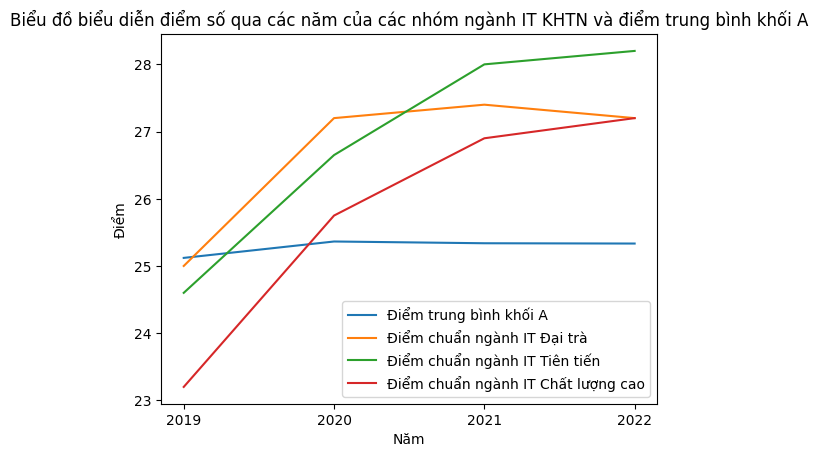

In [227]:
plt.plot(diemtbA.index,diemtbA.values,label = 'Điểm trung bình khối A')
plt.plot(diemDT.index,diemDT.values,label = 'Điểm chuẩn ngành IT Đại trà')
plt.plot(diemTT.index,diemTT.values,label = 'Điểm chuẩn ngành IT Tiên tiến')
plt.plot(diemCLC.index,diemCLC.values,label = 'Điểm chuẩn ngành IT Chất lượng cao')

plt.xlabel('Năm')
plt.ylabel('Điểm')
plt.title('Biểu đồ biểu diễn điểm số qua các năm của các nhóm ngành IT KHTN và điểm trung bình khối A')
plt.legend()
plt.show()

#### Từ năm 2020 điểm chuẩn tăng rất mạnh. Nguyên nhân là do số lượng chỉ tiêu cho kì thi THPTQG đã giảm đi khá nhiều (sự xuất hiện của kì thi đánh giá năng lực) + độ HOT của ngành IT

## CÂU 2: THỐNG KÊ TÌM ĐIỂM BẤT THƯỜNG

### Nhờ vào một số phép thống kê, một số giáo viên đã phát hiện ra gian lận thi cử ở năm 2018. Ta sẽ thử xem dữ liệu điểm thi vào các năm sau có gì khác thường không. Ta sẽ thống kê 3 cột bao gồm tổng số lượng thí sinh thi ở tỉnh đó, điểm trung bình TN THPT tỉnh đó và số lượng điểm trên 9 của tỉnh đó.

Ta lấy dữ liệu điểm năm 2019

In [230]:
df_2019 = core_df[core_df['Year'] == 2019]


Sau đó ta sẽ lấy mã tỉnh ra: là 2 kí tự đầu trong SBD của thí sinh

In [231]:
def returnSBD(i):
    if len(i) == 8:
        return i[:2]
    return '0{}'.format(i[0])

In [232]:
df_2019['Tinh'] = df_2019['sbd'].apply(returnSBD)

C:\Users\HP\AppData\Local\Temp\ipykernel_5040\650262768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Tinh'] = df_2019['sbd'].apply(returnSBD)


In [233]:
df_check_valid = pd.DataFrame([],index = sorted(df_2019['Tinh'].unique()))

Ta khởi tạo dataframe df_check_valid để lưu các cột mà ta cần

In [234]:
df_check_valid['Num'] = df_2019['Tinh'].value_counts().sort_index()

Ta lấy các cột điểm thi

In [235]:
df_score = df_2019[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD','Tinh']]

Tính trung bình điểm tốt nghiệp của 1 thí sinh, sau đó lưu vào cột Mean của df_score

In [236]:
df_score['Mean'] = np.nanmean(df_score[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD']],axis = 1)

C:\Users\HP\AppData\Local\Temp\ipykernel_5040\2943257996.py:1: RuntimeWarning: Mean of empty slice
  df_score['Mean'] = np.nanmean(df_score[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD']],axis = 1)
C:\Users\HP\AppData\Local\Temp\ipykernel_5040\2943257996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['Mean'] = np.nanmean(df_score[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD']],axis = 1)


Ta gom nhóm theo mã tỉnh, sau đó tính điểm thi trung bình của tỉnh đó và lưu vào df_check_valid

In [237]:
df_mean = df_score[['Tinh','Mean']]
df_mean = df_mean.groupby(['Tinh']).mean()
df_check_valid['Mean'] = df_mean['Mean']

Tiếp theo, ta tính số lượng điểm trên 9 của từng thí sinh, lưu vào cột 'NumOf9'

In [238]:

count_high = np.nansum(df_score[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD']]>=9,axis = 1)
df_score['NumOf9'] = count_high
df_count_high = df_score[['Tinh','NumOf9']]


Tiếp tục gom nhóm theo tỉnh và tính tổng điểm trên 9 của tỉnh đó

In [239]:
df_count_high = df_score[['Tinh','NumOf9']]
df_count_high = df_count_high.groupby(['Tinh']).sum()
df_check_valid['NumOf9'] = df_count_high['NumOf9']

Ta sẽ coi top 10 tỉnh có thí sinh đông nhất

In [240]:
top15num = df_check_valid['Num'].sort_values(ascending=False).reset_index().head(15)
top15num

,index,Num
0,01,74277
1,28,34886
2,29,32242
3,48,27525
4,40,20471
5,18,19554
6,21,19248
7,26,18986
8,03,18484
9,25,18275


Top 10 tỉnh có số điểm trung bình cao nhất nhiều nhất

In [241]:
top15mean = df_check_valid['Mean'].sort_values(ascending=False).reset_index().head(15)

Top 10 tỉnh có số lượng điểm trên 9 cao nhất

In [242]:
top15score9 = df_check_valid['NumOf9'].sort_values(ascending=False).reset_index().head(15)
top15score9

,index,NumOf9
0,01,10065
1,29,3271
2,28,3271
3,03,3209
4,15,2754
5,25,2605
6,16,2157
7,18,2115
8,30,2049
9,21,1978


Lấy ra mã tỉnh có điểm bất thường

In [243]:
for i in top15score9['index']:
    if i not in top15mean['index'].values and i not in top15num['index'].values:
        print(i)

19


MỚI LÀM 1 NĂM + CHƯA VẼ BIỂU ĐỒ. ĐỢI BỔ SUNG